In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

In [4]:
# Create a Decision Tree Classifier with Gini Index criterion
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

In [5]:
# Fit the classifier on the training data
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
# Make predictions on the test data
y_pred_gini = clf_gini.predict(X_test)

In [18]:
y_pred_gini

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2])

In [7]:
# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy using Gini Index: {accuracy_gini}')

Accuracy using Gini Index: 1.0


In [8]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gini))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier with Information Gain criterion (Entropy)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the classifier on the training data
clf_entropy.fit(X_train, y_train)

# Make predictions on the test data
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy using Information Gain (Entropy): {accuracy_entropy}')

Accuracy using Information Gain (Entropy): 0.975609756097561


In [10]:
from sklearn.tree import export_text

# Display the decision tree rules
tree_rules = export_text(clf_gini, feature_names=iris.feature_names)
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
| 

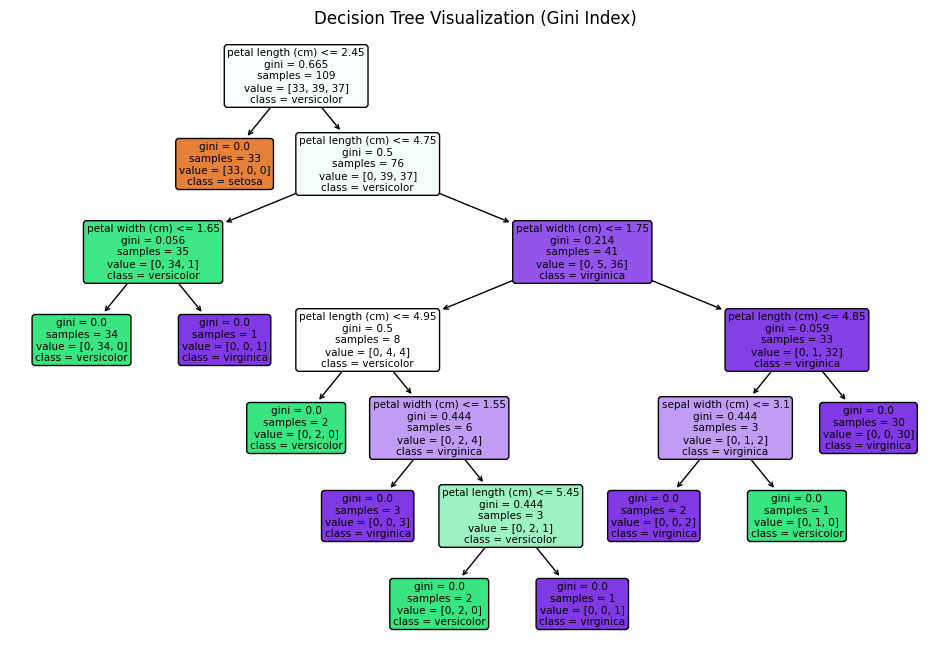

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Gini Index)")
plt.show()


In [12]:
# hyperparameter tuning
clf_gini_tuned = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=5, random_state=42)
clf_gini_tuned.fit(X_train, y_train)
y_pred_gini_tuned = clf_gini_tuned.predict(X_test)
accuracy_gini_tuned = accuracy_score(y_test, y_pred_gini_tuned)
print(f'Tuned Accuracy using Gini Index: {accuracy_gini_tuned}')


Tuned Accuracy using Gini Index: 1.0


In [13]:
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Pruned Accuracy: {accuracy_pruned}')


Pruned Accuracy: 1.0


In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(clf_gini, X, y, cv=5)
print(f'Cross-validated Accuracy: {scores.mean()}')


Cross-validated Accuracy: 0.9533333333333334


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate RSS
rss_score = mean_squared_error(y_test, y_pred) * len(y_test)
print(f'Residual Sum of Squares (RSS): {rss_score}')


Residual Sum of Squares (RSS): 0.0
